In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data=load_iris()

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["target"]=data.target

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df_final =  df[df['target'] != 2]

In [6]:
x=df_final.iloc[:,:-1]
y=df_final.iloc[:,-1]

In [7]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [8]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [11]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier

LogisticRegression()

In [12]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_pred=classifier.predict(x_test)

In [14]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [15]:
classifier.predict_proba(x_test)

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc,f1_score

confusion_matrix(y_test,y_pred)

array([[ 8,  0],
       [ 0, 12]])

In [17]:
accuracy_score(y_test,y_pred)

1.0

In [18]:
f1_score(y_test,y_pred)

np.float64(1.0)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [20]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [21]:
fpr,tpr,threshold

(array([0., 0., 1.]), array([0., 1., 1.]), array([inf,  1.,  0.]))

In [22]:
# calculate auc score

roc_auc=auc(fpr,tpr)
roc_auc

np.float64(1.0)

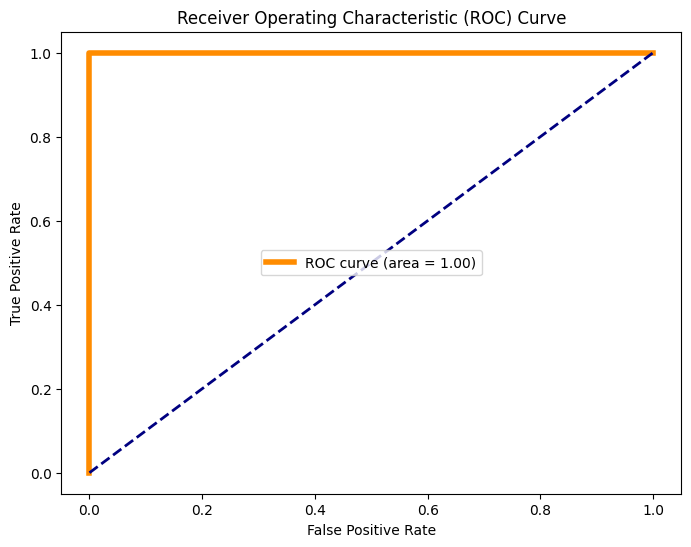

In [23]:
#plot roc-auc curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=4, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
#plt.xlim([0.0, 1.0])  # Set x-axis limits
#plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="center")  # Add legend to the plot
plt.show()  # Show the plot

In [24]:
#cross validation>>n two ways. ist>>LogisticRegressionCV or 2. Use Kfold
#as h/w LogisticRegressionCV, now Kfold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5)
# shuffle : bool, default=False
# Whether to shuffle the data before splitting into batches.
# Note that the samples within each split will not be shuffled.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv = cv, scoring = "accuracy")
np.mean(scores)

np.float64(1.0)

# decision Tree

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(criterion='entropy')
decision_tree

DecisionTreeClassifier(criterion='entropy')

In [29]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.6\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\nentropy = 0.165\nsam

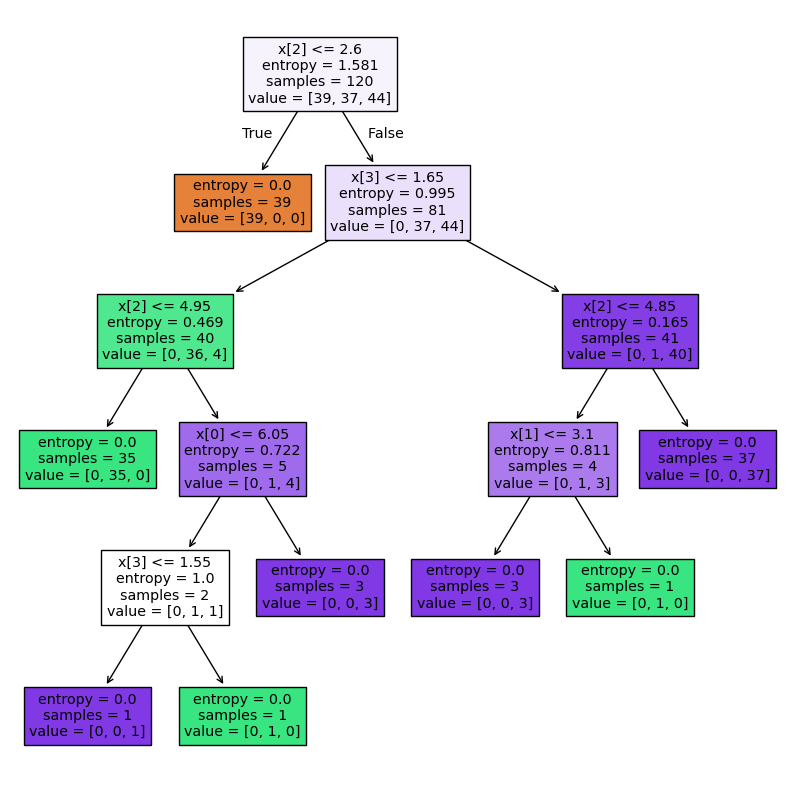

In [30]:
# visualization
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree,filled=True)

## postpruning >> to control the depth of decision tree using mex_depth

In [31]:
postpruning=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [32]:
postpruning.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.6\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]')]

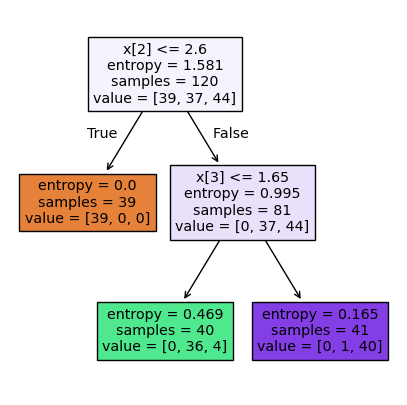

In [33]:
# visualization
from sklearn import tree

plt.figure(figsize=(5,5))
tree.plot_tree(postpruning,filled=True)

In [34]:
y_pred=postpruning.predict(x_test)

In [35]:
# evaluation metrix

confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [36]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## prepruning

In [38]:
parameters={'criterion':['entropy','gini','log_loss'],
            'splitter':['random','best'],
            'max_depth':[1,2,3,4,5],
            'max_features':['sqrt','log2','auto']}

In [39]:
from sklearn.model_selection import GridSearchCV

clf=DecisionTreeClassifier()
prepuning=GridSearchCV(clf,param_grid=parameters,cv=5,scoring='accuracy')

In [40]:
import warnings
warnings.filterwarnings('ignore')


prepuning.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [41]:
prepuning.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [42]:
y_pred=prepuning.predict(x_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [44]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [45]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

# decision tree regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
df=df.sample(frac=0.30)

In [48]:
df.shape

(45, 5)

In [49]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [51]:
regressor=DecisionTreeRegressor(criterion='poisson')

In [52]:
regressor

DecisionTreeRegressor(criterion='poisson')

In [53]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson')

In [54]:
y_pred=regressor.predict(x_test)

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.9960842325095719

In [56]:
parameters

{'criterion': ['entropy', 'gini', 'log_loss'],
 'splitter': ['random', 'best'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['sqrt', 'log2', 'auto']}

[Text(0.4, 0.8333333333333334, 'x[2] <= 3.5\npoisson = 0.426\nsamples = 36\nvalue = 0.917'),
 Text(0.2, 0.5, 'poisson = 0.197\nsamples = 13\nvalue = 0.077'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.85\npoisson = 0.083\nsamples = 23\nvalue = 1.391'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'poisson = 0.0\nsamples = 14\nvalue = 1.0'),
 Text(0.8, 0.16666666666666666, 'poisson = 0.0\nsamples = 9\nvalue = 2.0')]

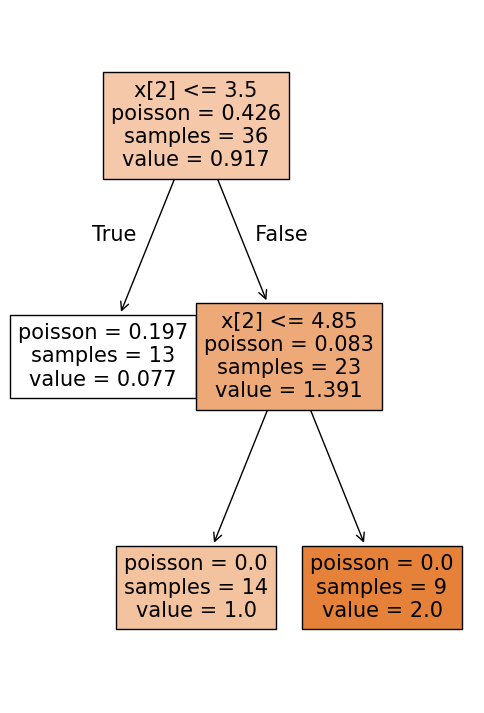

In [57]:
plt.figure(figsize=(6,9))
tree.plot_tree(regressor,filled=True)

In [58]:
parameter={'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
 'splitter': ['random', 'best'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['sqrt', 'log2', 'auto']}

In [59]:
parameter

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['random', 'best'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['sqrt', 'log2', 'auto']}

In [60]:
from sklearn.model_selection import GridSearchCV

model2=GridSearchCV(estimator=regressor,param_grid=parameter,scoring=None)

In [61]:
model2.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(criterion='poisson'),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['random', 'best']})

In [62]:
model2.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [63]:
end_model=DecisionTreeRegressor(criterion= 'squared_error',max_depth= 3,max_features= 'log2',
 splitter= 'best')

In [64]:
end_model

DecisionTreeRegressor(max_depth=3, max_features='log2')

In [65]:
end_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2')

In [66]:
y_pred=end_model.predict(x_test)

[Text(0.3333333333333333, 0.875, 'x[2] <= 2.5\nsquared_error = 0.576\nsamples = 36\nvalue = 0.917'),
 Text(0.16666666666666666, 0.625, 'squared_error = 0.0\nsamples = 12\nvalue = 0.0'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 5.75\nsquared_error = 0.234\nsamples = 24\nvalue = 1.375'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'squared_error = 0.0\nsamples = 9\nvalue = 1.0'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 4.85\nsquared_error = 0.24\nsamples = 15\nvalue = 1.6'),
 Text(0.5, 0.125, 'squared_error = 0.0\nsamples = 6\nvalue = 1.0'),
 Text(0.8333333333333334, 0.125, 'squared_error = 0.0\nsamples = 9\nvalue = 2.0')]

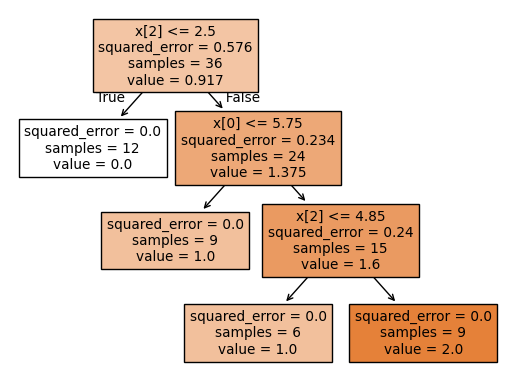

In [67]:
tree.plot_tree(end_model,filled=True)

<Axes: >

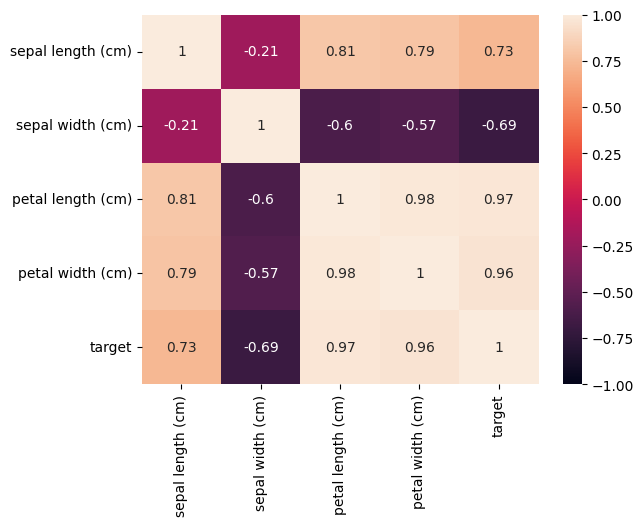

In [75]:
df_final.corr()
import seaborn as sns

sns.heatmap(df_final.corr(),vmin=-1,vmax=1,annot=True)

In [80]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [85]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 8499.563269105895
Iteration = 1, Loss = 1031.1735573148403
Iteration = 1, Loss = 131.15132051836903
Iteration = 1, Loss = 22.688845795984626
Iteration = 2, Loss = 9.617936682620991
Iteration = 3, Loss = 8.042749339570008
Iteration = 4, Loss = 7.852921573976064
Iteration = 5, Loss = 7.83004471392394
Iteration = 6, Loss = 7.827287254915499
Iteration = 7, Loss = 7.826954402740753
Iteration = 8, Loss = 7.826913742130896
Iteration = 9, Loss = 7.826908293839668
Iteration = 10, Loss = 7.82690708907127
Iteration = 11, Loss = 7.826906395748783
Iteration = 12, Loss = 7.826905764116316
Iteration = 13, Loss = 7.826905139973383
Iteration = 14, Loss = 7.826904516788234
Iteration = 15, Loss = 7.8269038937737125
Iteration = 16, Loss = 7.826903270834954
Iteration = 17, Loss = 7.8269026479605195
Iteration = 18, Loss = 7.8269020251490256
Iteration = 19, Loss = 7.826901402400299
Iteration = 20, Loss = 7.826900779714313


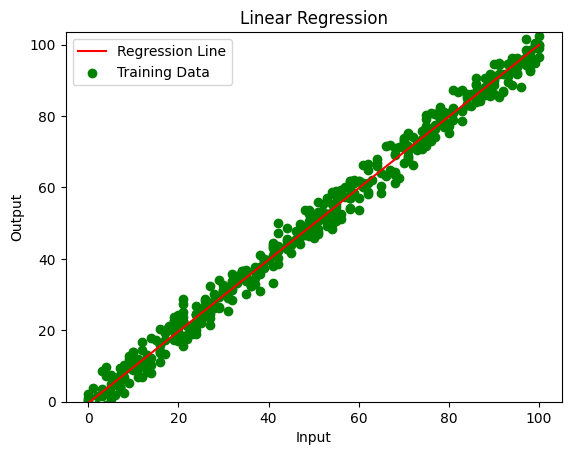

In [88]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)
